In [32]:
%pylab inline

import pickle

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [39]:
f = open('datadump.pkl', 'rb')
reviews = pickle.load(f)
f.close()

###  Aggregating our Data

In [42]:
scores = [x[0] for x in reviews]
writeups = [x[1] for x in reviews]

Text(0.5,1,"What do you Mean 'Vote-Brigading?'")

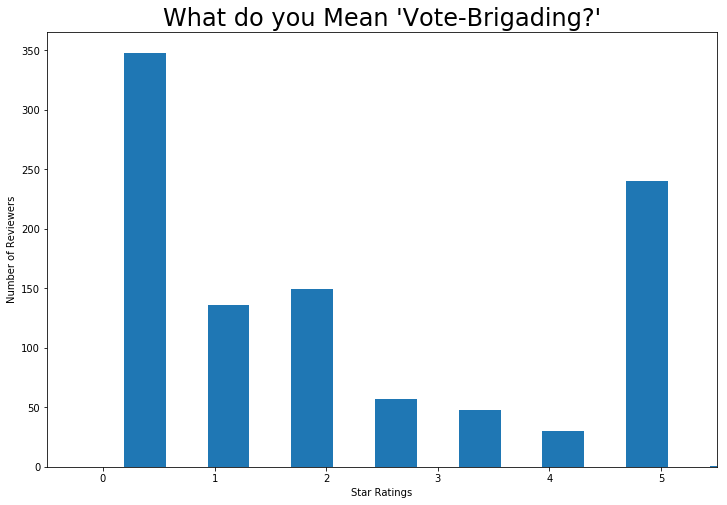

In [55]:
scoreArr = np.array(scores)
fig, ax = plt.subplots(figsize=(12, 8))

_ = ax.hist(scoreArr, bins=8, rwidth=.5)
ax.set_xlim([-.5, 5.5])
ax.set_xlabel('Star Ratings')
ax.set_ylabel('Number of Reviewers')
ax.set_title("What do you Mean 'Vote-Brigading?'", fontsize=24)

###  Do unhappy people write more?

In [56]:
writeupLengths = np.array([len(x) for x in writeups])

Text(0.5,1,'Mad About Star Wars')

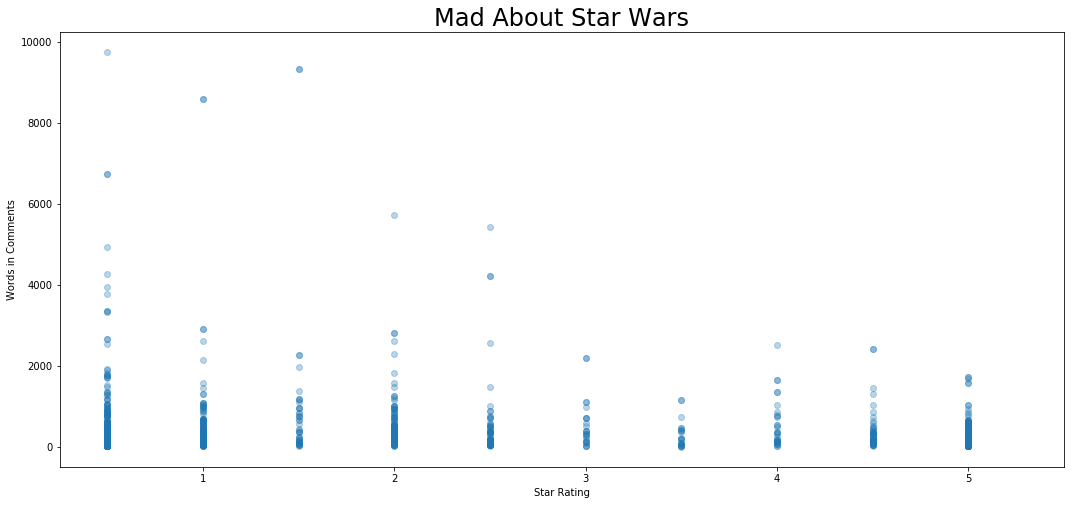

In [63]:
fig, ax = plt.subplots(figsize=(18,8))
ax.scatter(scoreArr, writeupLengths, alpha=.3)
ax.set_xlim([0.25, 5.5])
ax.set_ylabel('Words in Comments')
ax.set_xlabel('Star Rating')
ax.set_title("Mad About Star Wars", fontsize=24)

### Fish for Reviews by use of a word

In [100]:
def fish_for_naughty_words(writeups, word):
    return [x.lower().find(word)!=-1 for x in writeups]

In [98]:
def profile_ratings_by_word(writeups, word):
    print(pd.Series(scoreArr[fish_for_naughty_words(writeups, word)]).describe())

In [96]:
profile_ratings_by_word(writeups, 'feminist')

count    8.000000
mean     0.500000
std      0.377964
min      0.000000
25%      0.375000
50%      0.500000
75%      0.625000
max      1.000000
dtype: float64


In [101]:
profile_ratings_by_word(writeups, 'great')

count    174.000000
mean       2.836207
std        1.783972
min        0.500000
25%        1.000000
50%        2.500000
75%        5.000000
max        5.000000
dtype: float64
